<a href="https://colab.research.google.com/github/dujest/yolov5-workshop/blob/main/Deep_CNN_Image_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt
import numpy as np

In [ ]:
!mkdir /content/drive/MyDrive/colab

In [3]:
%cd /content/drive/MyDrive/colab

/content/drive/MyDrive/colab


In [ ]:
!mkdir "/content/drive/MyDrive/colab/corrosion_dataset"
!wget  "https://universe.roboflow.com/ds/LQgs4TYGAN?key=Q2icURdATO" -O "/content/drive/MyDrive/colab/corrosion_dataset/corrosion.zip"
!unzip "/content/drive/MyDrive/colab/corrosion_dataset/corrosion.zip" -d "/content/drive/MyDrive/colab/corrosion_dataset"
!rm -r "/content/drive/MyDrive/colab/corrosion_dataset/corrosion.zip"

In [4]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Resize(320), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

transform1 = transforms.Compose([transforms.ToTensor(),
                                 transforms.Resize(320),
                                 transforms.RandomHorizontalFlip(p=0.9),
                                 transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                                ])

batch_size = 4

trainset = torchvision.datasets.ImageFolder('/content/drive/MyDrive/colab/corrosion_dataset/train', transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

testset = torchvision.datasets.ImageFolder('/content/drive/MyDrive/colab/corrosion_dataset/valid', transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=True, num_workers=2)

classes = ("Corrosion", "No corrosion")

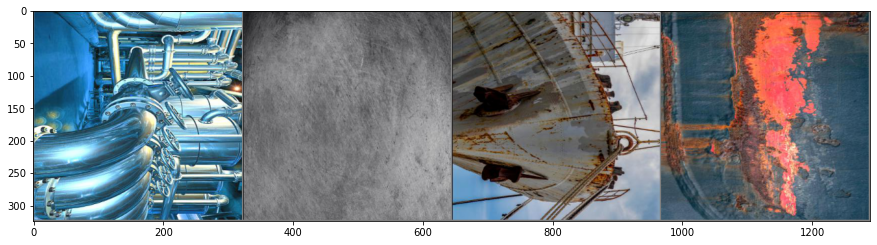

No corrosion
No corrosion
Corrosion 
Corrosion 


In [12]:
%matplotlib inline

plt.rcParams["figure.figsize"] = (15, 50)

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# fetchs a batch from the train set
dataiter = iter(trainloader)
images, labels = dataiter.next()


imshow(torchvision.utils.make_grid(images))
print('\n'.join(f'{classes[labels[j]]:10s}' for j in range(batch_size)))